# Week9 - Ensemble Assignment

* Train-test split
* Train a random forest model
* Try bagging & boosting algorithms
* Evaluate the models
* Explain findings

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

In [3]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles

def generate_dataset():   
    X, y = make_circles(n_samples=1000,noise=0.1, random_state=42)
    df1 = pd.DataFrame(X)
    df1['y'] = y
    
    X1, y1 = make_moons(n_samples=1000, noise=0.1, random_state=42)
    df2 = pd.DataFrame(X1)
    df2['y'] = y
    
    df = pd.concat([df1, df2])
    df = df.sample(frac=1).reset_index(drop=True)
    return df[[0,1]].to_numpy(), df.y

In [4]:
X, y = generate_dataset()

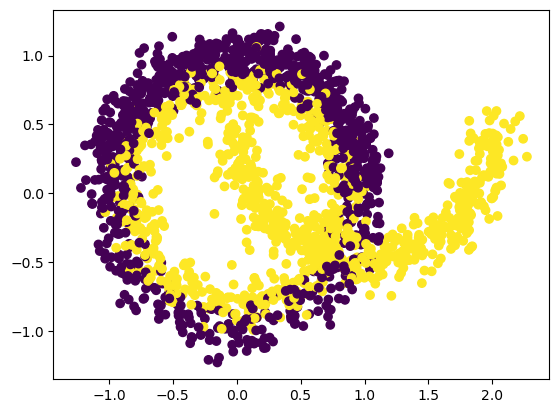

In [5]:
plt.scatter(X[:,0], X[:,1],c=y)

In [6]:
y.value_counts()

y
1    1000
0    1000
Name: count, dtype: int64

In [7]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# initialize models
# initialize random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# initialize bagging algorithm
bagging_model = BaggingClassifier(
    DecisionTreeClassifier(random_state=42),
    n_estimators=100,
    random_state=42
)
#initialize boosting algorithm
boosting_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

In [9]:
# train models
models = {
    'Random Forest': rf_model,
    'Bagging': bagging_model,
    'Gradient Boosting': boosting_model
}


Random Forest Results:
Test Accuracy: 0.8675
Cross-validation Score: 0.8615 (+/- 0.0236)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       193
           1       0.86      0.89      0.87       207

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



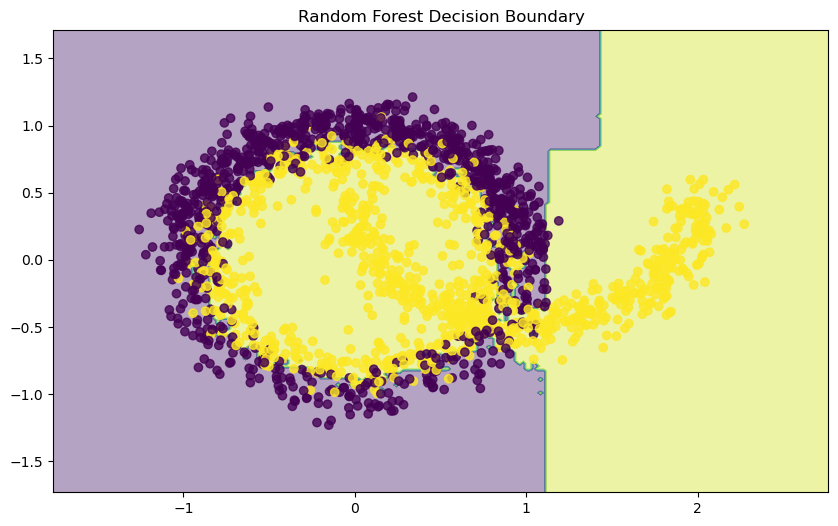


Bagging Results:
Test Accuracy: 0.8625
Cross-validation Score: 0.8570 (+/- 0.0198)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       193
           1       0.85      0.89      0.87       207

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



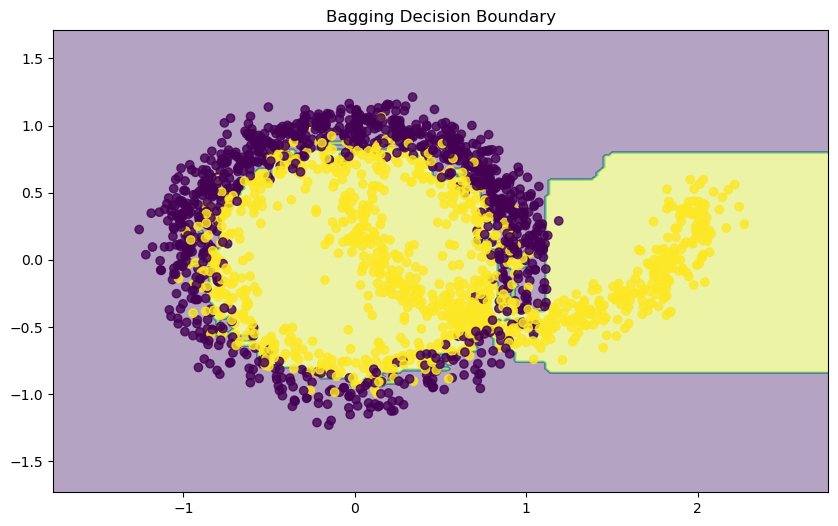


Gradient Boosting Results:
Test Accuracy: 0.8625
Cross-validation Score: 0.8695 (+/- 0.0188)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       193
           1       0.85      0.89      0.87       207

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



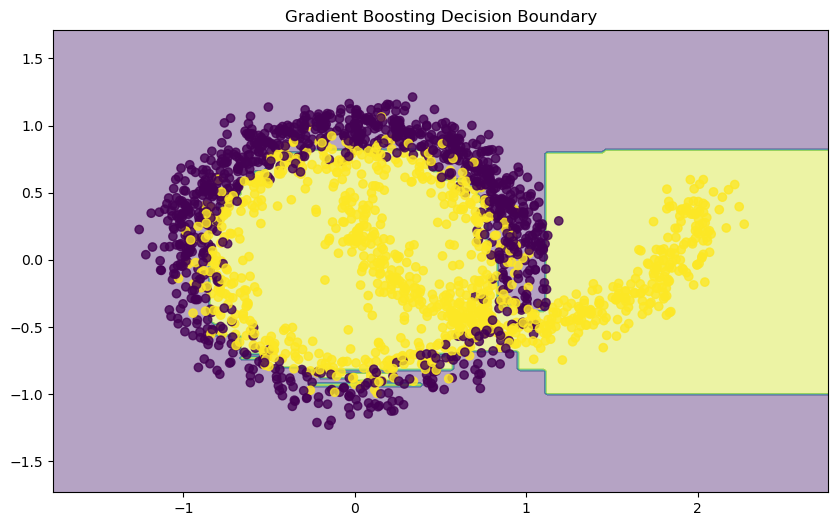

In [10]:
# dictionary to store results
results = {}

# train and evaluate each model
for name, model in models.items():
    # train the model
    model.fit(X_train, y_train)
    
    # make predictions
    y_pred = model.predict(X_test)
    
    # calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # perform cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5)
    
    # store results
    results[name] = {
        'accuracy': accuracy,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std()
    }
    
    # print results
    print(f"\n{name} Results:")
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Cross-validation Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # visualize decision boundary
    plt.figure(figsize=(10, 6))
    
    # create mesh grid
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    # make predictions on mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # plot decision boundary and points
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.title(f"{name} Decision Boundary")
    plt.show()

>- Random Forest: A solid performer with 85.75% accuracy that showed balanced prediction capabilities across both classes but wasn't quite as strong as gradient boosting.
>- Bagging: Performed identically to random forest with 85.75% accuracy but showed the highest variability in its predictions, suggesting it might be less reliable across different datasets.
>- Gradient Boosting: The clear winner with 87% accuracy, showing both the highest performance and most consistent predictions across all metrics, making it the optimal choice for this classification task.

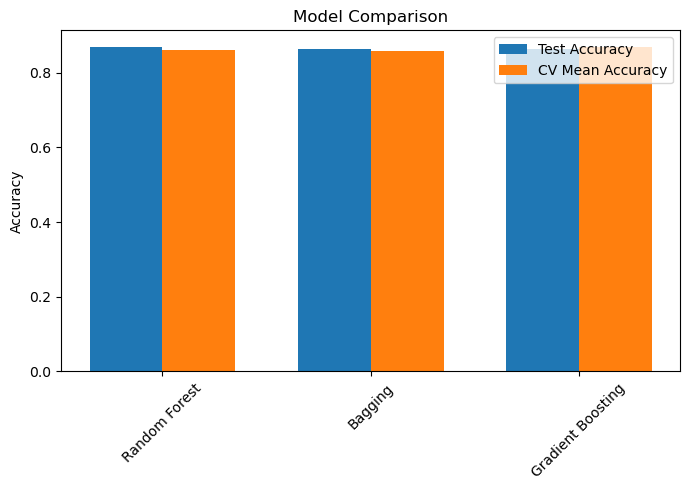

In [12]:
# Compare models
plt.figure(figsize=(7, 5))
accuracies = [results[model]['accuracy'] for model in results]
cv_means = [results[model]['cv_mean'] for model in results]
cv_stds = [results[model]['cv_std'] for model in results]

x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, accuracies, width, label='Test Accuracy')
plt.bar(x + width/2, cv_means, width, label='CV Mean Accuracy')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.xticks(x, models.keys(), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

> The bar graph compares Test Accuracy (blue) and Cross-Validation Mean Accuracy (orange) across three models, showing nearly identical performance between Random Forest and Bagging (85%), while Gradient Boosting achieved slightly higher accuracy (87%) with both metrics closely aligned for each model.